<a href="https://colab.research.google.com/github/nysdan/Microbiota_ORT.2024/blob/main/Microbiota2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦠 Análisis de Datos de Secuenciación de Amplicones con QIIME 2




Todos los experimentos de secuenciación de amplicón o metagenomas comienzan como datos crudos de secuenciación, probablemente como archivos del tipo *fastq*, que contienen, además de las secuencias de los *reads*, la calidad asociada a cada base.

Para determinar de qué muestra provino cada *read* debemos primero __*demultiplexar*__ los *reads*.

Luego, se realiza el **_denoising_** de los *reads*, para obtener las variantes de secuencias de amplicones (AVSs), o clusterizarlos para obtener las unidades taxonómicas operacionales (OTUs), con el fin de:
1. Reducir los errores de secuencia y otros artefactos
2. Desrreplicar las secuencias.


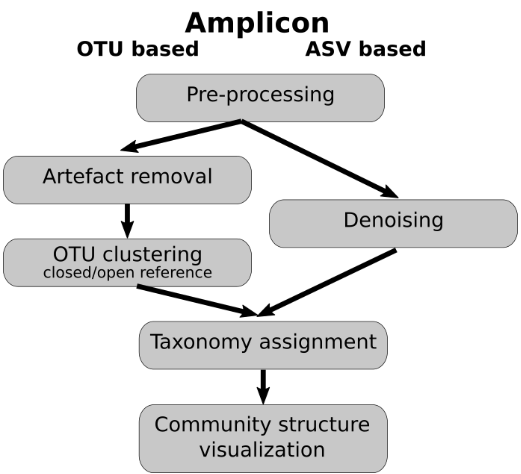

### Antes de seguir:
Guarda una copia de notebook yendo al menú Archivo => Guardar una copia en drive.

---
# Setup

QIIME 2 generalmente se instala siguiendo las [instrucciones de instalación oficiales](https://docs.qiime2.org/2024.5/install/). Sin embargo, debido a que estamos utilizando Google Colab y existen algunas advertencias sobre el uso de conda aquí,  usaremos una instalación alternativa que se generó para el curso "Amplicon Sequencing Data Analysis with QIIME 2" (ISB 2024, Gibbons Lab.).

Para comenzar, vamos a clonar el repositorio con los datos:

In [ ]:
!git clone https://github.com/nysdan/Microbiota_ORT.2024.git

Cloning into 'Microbiota_ORT.2024'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 45 (delta 11), reused 31 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (45/45), 14.38 MiB | 16.97 MiB/s, done.
Resolving deltas: 100% (11/11), done.


In [ ]:
!ls

Microbiota_ORT.2024  sample_data


In [ ]:
%cd Microbiota_ORT.2024/
!ls

/content/Microbiota_ORT.2024
data		     ERR1513703.fastq.gz  ERR1513889.fastq.gz  ERR1513983.fastq.gz
ERR1513684.fastq.gz  ERR1513777.fastq.gz  ERR1513961.fastq.gz  ERR1514003.fastq.gz
ERR1513701.fastq.gz  ERR1513870.fastq.gz  ERR1513964.fastq.gz  setup_qiime2


**Pregunta:**
¿Cuál es la diferencia entre utilizar `%` y `!`?

Mueve los archivos que contienen secuencias al directorio `data` en la siguiente celda de código:

In [ ]:
!mv *.gz data && ls data

ERR1513684.fastq.gz  ERR1513777.fastq.gz  ERR1513961.fastq.gz  ERR1514003.fastq.gz  metadata.tsv
ERR1513701.fastq.gz  ERR1513870.fastq.gz  ERR1513964.fastq.gz  manifest2.tsv
ERR1513703.fastq.gz  ERR1513889.fastq.gz  ERR1513983.fastq.gz  manifest.tsv


Ahora solo nos resta instalar y configurar QIIME. Para esto corremos la siguiente celda:

In [ ]:
%run setup_qiime2

[19:12:34] 🐍 Downloading miniforge...                                                              ]8;id=304699;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=481433;file:///content/Microbiota_ORT.2024/setup_qiime2#67\67]8;;\

[19:12:36] 🐍 Done.                                                                                 ]8;id=353178;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=519794;file:///content/Microbiota_ORT.2024/setup_qiime2#73\73]8;;\

           🐍 Installing miniforge...                                                               ]8;id=290050;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=33507;file:///content/Microbiota_ORT.2024/setup_qiime2#67\67]8;;\

[19:12:49] 🐍 Installed miniforge to `/usr/local`.                                                  ]8;id=176972;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=500302;file:///content/Microbiota_ORT.2024/setup_qiime2#73\73]8;;\

           🔍 Downloading Qiime 2 package list...                                                   ]8;id=896699;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=405337;file:///content/Microbiota_ORT.2024/setup_qiime2#67\67]8;;\

[19:12:50] 🔍 Done.                                                                                 ]8;id=815507;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=301714;file:///content/Microbiota_ORT.2024/setup_qiime2#73\73]8;;\

           🔍 Installing Qiime 2. This may take a little bit.                                       ]8;id=327075;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=825012;file:///content/Microbiota_ORT.2024/setup_qiime2#67\67]8;;\
            🕐                                                                                                     

[19:17:55] 🔍 Done.                                                                                 ]8;id=814135;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=23176;file:///content/Microbiota_ORT.2024/setup_qiime2#73\73]8;;\

           🌲 Installing Empress...                                                                 ]8;id=962377;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=113235;file:///content/Microbiota_ORT.2024/setup_qiime2#67\67]8;;\

[19:18:00] 🌲 Done.                                                                                 ]8;id=407508;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=206459;file:///content/Microbiota_ORT.2024/setup_qiime2#73\73]8;;\

           📊 Checking that Qiime 2 command line works...                                           ]8;id=306376;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=671455;file:///content/Microbiota_ORT.2024/setup_qiime2#67\67]8;;\

[19:18:13] 📊 Qiime 2 command line looks good 🎉                                                    ]8;id=18958;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=991806;file:///content/Microbiota_ORT.2024/setup_qiime2#73\73]8;;\

           🧹 Cleaned up unneeded files.                                                            ]8;id=248031;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=300017;file:///content/Microbiota_ORT.2024/setup_qiime2#62\62]8;;\

           Everything is A-OK. You can start using Qiime 2 now 👍                                  ]8;id=168671;file:///content/Microbiota_ORT.2024/setup_qiime2\setup_qiime2]8;;\:]8;id=200959;file:///content/Microbiota_ORT.2024/setup_qiime2#149\149]8;;\

Esto puede tomar unos 10-15 minutos.

---
# Importar los datos

Para correr el *pipeline* de QIIME2 se necesita:
1. **Datos crudos de secuenciación** (.fastq): A diferencia de los .`fasta`, los archivos `.fastq` contienen, además de la secuencia, la calidad asociada a cada base.

2. **Archivo de metadatos** (.tsv): Normalmente contiene un identificador de la muestra, y otros datos de la muestra que no son su secuencia, como edad, This file contains the sample id, along with all non-sequencing data for each sample. Here, our metadata includes disease status, age, sex, BMI, geographical location, and prescription drug use, as well as some information on diet anorigen, etc, que dependerán del tipo de análisis y los datos analizados.

3. **Archivo Manifesto** (.tsv): Contiene el ID de la muestra y la ruta al/a los archivos `fastq`. Sirve para matchear las muestras con los archivos.

Vamos a ver qué archivos encontramos en nuestra carpeta, y qué contienen.

Por ejemplo, podemos visualizar el archivo `manifest.tsv` usando la terminal:

In [ ]:
import pandas as pd
manifest = pd.read_csv('/content/Microbiota_ORT.2024/data/manifest.tsv', sep = '\t')
manifest

,sample-id,absolute-filepath
0,ERR1513701,$PWD/data/ERR1513701.fastq.gz
1,ERR1513870,$PWD/data/ERR1513870.fastq.gz
2,ERR1513889,$PWD/data/ERR1513889.fastq.gz
3,ERR1513684,$PWD/data/ERR1513684.fastq.gz
4,ERR1513703,$PWD/data/ERR1513703.fastq.gz
5,ERR1514003,$PWD/data/ERR1514003.fastq.gz
6,ERR1513961,$PWD/data/ERR1513961.fastq.gz
7,ERR1513983,$PWD/data/ERR1513983.fastq.gz
8,ERR1513964,$PWD/data/ERR1513964.fastq.gz
9,ERR1513777,$PWD/data/ERR1513777.fastq.gz


O, por ejemplo, utilizando la función `read_csv` del módulo `Pandas` utilizando `Python`.

In [ ]:
import pandas as pd
manifest = pd.read_csv('data/manifest.tsv', sep = '\t')
manifest

,sample-id,absolute-filepath
0,ERR1513701,$PWD/data/ERR1513701.fastq.gz
1,ERR1513870,$PWD/data/ERR1513870.fastq.gz
2,ERR1513889,$PWD/data/ERR1513889.fastq.gz
3,ERR1513684,$PWD/data/ERR1513684.fastq.gz
4,ERR1513703,$PWD/data/ERR1513703.fastq.gz
5,ERR1514003,$PWD/data/ERR1514003.fastq.gz
6,ERR1513961,$PWD/data/ERR1513961.fastq.gz
7,ERR1513983,$PWD/data/ERR1513983.fastq.gz
8,ERR1513964,$PWD/data/ERR1513964.fastq.gz
9,ERR1513777,$PWD/data/ERR1513777.fastq.gz


Podemos también ver el archivo `metadata.tsv` en `Python`.

**Pregunta:** ¿Qué variables están asociadas a los datos?

In [ ]:
metadata = pd.read_csv('data/metadata.tsv', sep='\t')
metadata

,id,parkinson_disease,sex,age,bmi,stool_travel_time,location,anticholinergic,carbidopa_levodopa,comt_inhibitor,p3m_antibiotics_bool,p3m_constipation,fruits_or_vegetables,grains
0,ERR1513684,Yes,male,58.0,25.33,6.0,"Atlanta, GA",N,Y,N,Yes,Yes,At least once a day,At least once a day
1,ERR1513701,Yes,male,78.0,18.99,2.0,"Atlanta, GA",N,Y,N,No,No,Few times a week,At least once a day
2,ERR1513703,Yes,female,53.0,27.92,4.0,"Atlanta, GA",N,Y,N,Yes,No,At least once a day,At least once a day
3,ERR1513777,No,female,62.0,22.96,1.0,"Albany, NY",N,N,N,No,No,At least once a day,At least once a day
4,ERR1513870,Yes,male,70.0,25.68,8.0,"Seattle, WA",N,Y,N,Yes,Yes,Few times a week,At least once a day
5,ERR1513889,Yes,male,78.0,30.51,3.0,"Seattle, WA",N,Y,N,No,No,At least once a day,Few times a week
6,ERR1513961,No,female,67.0,24.48,2.0,"Seattle, WA",N,N,N,Yes,No,At least once a day,At least once a day
7,ERR1513964,No,female,69.0,33.47,4.0,"Seattle, WA",N,N,N,No,No,At least once a day,Few times a week
8,ERR1513983,No,female,72.0,25.84,2.0,"Seattle, WA",N,N,N,No,No,At least once a day,At least once a day
9,ERR1514003,No,male,63.0,31.29,3.0,"Seattle, WA",N,N,N,No,No,At least once a day,At least once a day


Ahora, podremos utilizar el archivo `manifest.tsv` para importar los datos a QIIME.

In [ ]:
!pwd
!cat data/manifest.tsv

/content/Microbiota_ORT.2024
sample-id	absolute-filepath
ERR1513701	$PWD/data/ERR1513701.fastq.gz
ERR1513870	$PWD/data/ERR1513870.fastq.gz
ERR1513889	$PWD/data/ERR1513889.fastq.gz
ERR1513684	$PWD/data/ERR1513684.fastq.gz
ERR1513703	$PWD/data/ERR1513703.fastq.gz
ERR1514003	$PWD/data/ERR1514003.fastq.gz
ERR1513961	$PWD/data/ERR1513961.fastq.gz
ERR1513983	$PWD/data/ERR1513983.fastq.gz
ERR1513964	$PWD/data/ERR1513964.fastq.gz
ERR1513777	$PWD/data/ERR1513777.fastq.gz

## De `fastq` a Artefactos

Todos los archivos intermedios en un análisis con QIIME se denominan  **Artefactos** y tienen la extensión `qza`. Estos no son más que archivos carpetas comprimidas con `.zip`.

Para ingresar datos de secuenciación a QIIME2, debemos transformarlos en artefactos de QIIME, utilizando el siguiente comando:


In [ ]:

!qiime tools import \
  --type 'SampleData[SequencesWithQuality]' \
  --input-path data/manifest.tsv \
  --output-path sequences.qza \
  --input-format SingleEndFastqManifestPhred33V2

Imported data/manifest.tsv as SingleEndFastqManifestPhred33V2 to sequences.qza


### Preguntas:
1. ¿Qué indican los argumentos `type` e `input-format`?
1. ¿Qué tipo de *reads* se ingresaron?
2. ¿Qué tipo de archivo se produce?

##De artefacto a visualización 🔎
Para generar una visualización a partir de un artefacto debemos usar un comando que genere un archivo `.qzv`, que cargaremos en la web http://view.qiime2.org para visualizar.

In [ ]:
!qiime demux summarize \
--i-data sequences.qza \
--o-visualization qualities.qzv

Saved Visualization to: qualities.qzv


### Preguntas:
1. ¿Qué tipo de archivo se produce?
2. ¿Cómo resultó el análisis de calidad?
    - ¿Es necesario hacer algún tipo de filtrado o *trimmeado*?
    - ¿Hay que truncar los *reads* en alguna posición para evitar una disminución en la calidad global de los *reads*?


Descarga el archivo qualities.qzv y visualiza en http://view.qiime2.org

---
# Filtrado por calidad: Desde secuencia a ASV

***Denoising***:

El proceso de *denoising* que realiza `dada2` parte de los *reads* demultiplexados, y se compone de varias etapas:

1.   Filtrar y trimmear los *reads*
2.   Encontrar el set más probable de secuencias únicas en las muestras (ASVs)
3.   Eliminar quimeras
4.   Contar abundancias de cada ASV

Pero, ¿Qué son los ASVs? ¿Cómo se obtienen?

In [ ]:
!qiime dada2 denoise-single \
    --i-demultiplexed-seqs sequences.qza \
    --p-trunc-len 150 \
    --p-n-threads 2 \
    --output-dir dada --verbose

Running external command line application(s). This may print messages to stdout and/or stderr.
The command(s) being run are below. These commands cannot be manually re-run as they will depend on temporary files that no longer exist.

Command: run_dada.R --input_directory /tmp/qiime2/root/data/a5b83da6-33dc-4e7a-b74a-98d25b1577aa/data --output_path /tmp/tmpd5c6crns/output.tsv.biom --output_track /tmp/tmpd5c6crns/track.tsv --filtered_directory /tmp/tmpd5c6crns --truncation_length 150 --trim_left 0 --max_expected_errors 2.0 --truncation_quality_score 2 --max_length Inf --pooling_method independent --chimera_method consensus --min_parental_fold 1.0 --allow_one_off False --num_threads 2 --learn_min_reads 1000000 --homopolymer_gap_penalty NULL --band_size 16

Warning message:
package ‘optparse’ was built under R version 4.2.3 
R version 4.2.2 (2022-10-31) 
Loading required package: Rcpp
DADA2: 1.26.0 / Rcpp: 1.0.11 / RcppParallel: 5.1.6 
2) Filtering ..........
3) Learning Error Rates
270565

### Preguntas:
1. ¿Cuál es el *input* del comando?
2. ¿Qué parámetro de filtrado se utilizó?
3. ¿Qué esperas obtener?

Este comando produce varios archivos:
- `representative_sequences.qza` contiene la tabla de abundancias de ASVs 🧬
- `denoising-stats.qza` contiene las estadósticas del *denoising* 📊

Ahora, para determinar si los resultados obtenidos fueron los esperados, vamos a generar una visualización. Para esto, utilizamos el *plugin* `qiime2 metadata tabulate`:

In [ ]:
!qiime metadata tabulate \
    --m-input-file dada/denoising_stats.qza \
    --o-visualization dada/denoising-stats.qzv

Saved Visualization to: dada/denoising-stats.qzv


Descargamos el archivo `qzv` resultante y lo subimos a la web http://view.qiime2.org.


### Preguntas:
1. ¿Qué porcentaje de *reads* se conservaron?
2. ¿Cuál fue la proporción de quimeras?
    - Normalmente se identifica entre 5 y 25 % de las secuencias como quimeras.

---
# Filogenetica

En los pasos anteriores obtuvimos la tabla de conteos de ASVs y las secuencias correspondientes a cada ASV.

Ahora vamos a calcular algunas métricas de diversidad.

### De ASVs a árboles filogenéticos

Algunas métricas de diversidad son calculadas utilizando la distancia filogenética, para lo cual es necesario construír un árbol filogenético.

Esto se hace con el *plugin* `qiime phylogeny`.

In [ ]:
!qiime phylogeny align-to-tree-mafft-fasttree \
    --i-sequences dada/representative_sequences.qza \
    --output-dir tree

Saved FeatureData[AlignedSequence] to: tree/alignment.qza
Saved FeatureData[AlignedSequence] to: tree/masked_alignment.qza
Saved Phylogeny[Unrooted] to: tree/tree.qza
Saved Phylogeny[Rooted] to: tree/rooted_tree.qza


El comando de arriba realiza un alineamiento múltiple con `mafft` y luego una filogenia con `Fasttree` a partir de las secuencias de los ASVs, guardando el *output* en la carpeta `tree/`

In [ ]:
!qiime empress tree-plot \
    --i-tree tree/rooted_tree.qza \
    --o-visualization tree/empress.qzv

Saved Visualization to: tree/empress.qzv


In [ ]:
!qiime metadata tabulate --m-input-file dada/table.qza \
    --o-visualization dada/table.qzv

Saved Visualization to: dada/table.qzv


Visualiza los resultados

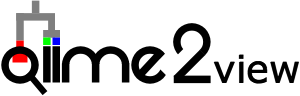

---
# Diversidad

## 1. Bases

Para calcular las métricas de diversidad utilizaremos el *plugin* `diversity core-metrics-phylogenetic`, que calcula diferentes métricas filogenéticas y no filogenéticas.

Para esto, usaremos la tabla y el árbol.
Como hay diferencias entre las muestras en cuanto a la profundidad de *sampleo*, vamos a rarefaccionar las muestras. Esto es, seleccionar secuencias de forma aleatoria antes de compararlas para contar con grupos balanceados.

In [ ]:
!qiime diversity core-metrics-phylogenetic \
    --i-table dada/table.qza \
    --i-phylogeny tree/rooted_tree.qza \
    --p-sampling-depth 5000 \
    --m-metadata-file data/metadata.tsv \
    --output-dir diversity

Saved FeatureTable[Frequency] to: diversity/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: diversity/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: diversity/evenness_vector.qza
Saved DistanceMatrix to: diversity/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: diversity/jaccard_distance_matrix.qza
Saved DistanceMatrix to: diversity/bray_curtis_distance_matrix.qza
Saved PCoAResults to: diversity/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: diversity/weighted_unifrac_pcoa_results.qza
Saved PCoAResults to: diversity/jaccard_pcoa_results.qza
Saved PCoAResults to: diversity/bray_curtis_pcoa_results.qza
Saved Visualization to: diversity/unweighted_unifrac_emperor.qzv
Saved Visualization to: diversity/weighted_unifrac_emperor.qzv
Saved

###Preguntas:
1. ¿Qué índices de diversidad o distancias se calcularon?
1. ¿A qué corresponden?



El comando anterior generó múltiples datos y visualizaciones. Ahora vamos a darles significado.

## ¿Los microbiomas de los controles son más o menos diversos que los de los pacientes con Parkinson?

Para responder esta pregunta es necesario ver la significancia de las diferencias entre los índices de α-diversidad de controles y pacientes.

Para esto usaremos el índice de diversidad de Shannon de cada muestra y crearemos una visualización:


In [ ]:
!qiime diversity alpha-group-significance \
    --i-alpha-diversity diversity/shannon_vector.qza \
    --m-metadata-file data/metadata.tsv \
    --o-visualization diversity/alpha_groups.qzv

Saved Visualization to: diversity/alpha_groups.qzv


Visualiza los resultados

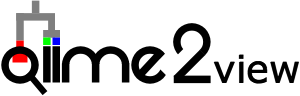

### Pregunta:

¿Las diferencias son significativas?


## ¿Cómo se distinguen las muestras de los controles de las de los pacientes de Parkinson?


Vamos ahora a visualizar la β-diversidad y cómo se separan. Para esto, utilizaremos la distancia UniFrac pesada, que es una medida basada en la filogenia, que se basa en el largo de las ramas no compartidas y tiene en cuenta la abundancia de los taxos.

Podremos buscar separaciones significativas entre muestras haciendo un PERMANOVA.

Para esto, utilizaremos el _plugin_ `diversity`:

- __`diversity adonis`__ especifica que se realizará un test PERMANOVA
- __`--i-distance-matrix diversity/weighted_unifrac_distance_matrix.qza`__ indica que se utilizará como _input_ el resultado de la determinación de las distancias UniFrac pesadas
- __`--p-formula "parkinson_disease"`__ indica que la variable de agrupamiento es la enfermedad de Parkinson




In [ ]:
!qiime diversity adonis \
    --i-distance-matrix diversity/weighted_unifrac_distance_matrix.qza \
    --m-metadata-file data/metadata.tsv \
    --p-formula "parkinson_disease" \
    --p-n-jobs 2 \
    --o-visualization diversity/permanova.qzv

Saved Visualization to: diversity/permanova.qzv
